In [1]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

TF Version:  2.5.0
TF-Hub version:  0.12.0
Eager mode enabled:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available:  True


In [89]:
@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=None, preserve_aspect_ratio=True):
    # Cache image file locally.
    image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
    # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
    img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
    if image_size:
        img_shape = image_size
    else:
        img_shape = img.shape[1:3]
    if img.max() > 1.0:
        img = img / 255.
    if len(img.shape) == 3:
        img = tf.stack([img, img, img], axis=-1)
    img = tf.image.resize(img, img_shape, preserve_aspect_ratio=True)
    return img

In [24]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [92]:
content_url = 'https://scontent.fpnh22-2.fna.fbcdn.net/v/t1.6435-9/123545363_209640000552282_9217736487220073497_n.jpg?_nc_cat=103&ccb=1-3&_nc_sid=09cbfe&_nc_ohc=KxOCzsxcFOkAX9xquc0&_nc_ht=scontent.fpnh22-2.fna&oh=f85740ea780ef774fdf9070e4c8d2e07&oe=60BB4601'
style_url = 'https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg'

content_image_size = None
style_image_size = (256, 256)

content_image = load_image(content_url, content_image_size)
style_image = load_image(style_url, style_image_size)

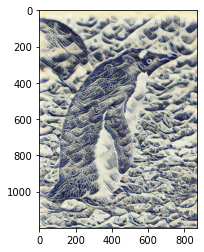

In [93]:
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0][0]
plt.imshow(stylized_image)
tf.keras.preprocessing.image.save_img('stylized_image.jpg', stylized_image)

In [1]:
style_path = "Images/Style/"